In [1]:
# Importo le librerie necessarie
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

# Per evitare i warning 
warnings.simplefilter(action='ignore', category=FutureWarning)

# Carico il Dataset
df = pd.read_csv('MrBeast400.csv')

In [2]:
from sklearn.preprocessing import LabelEncoder

# Definisco il numero di fasce desiderate
num_bins = 10

# Utilizzo pd.qcut per creare intervalli uguali in base alla colonna di interesse
df['Class'] = pd.qcut(df['Like/ViewsRatio'], q=num_bins, labels=False, duplicates='drop')

# Converto gli indici numerici degli intervalli in etichette numeriche
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Rimuovo eventuali righe con valori mancanti
df = df.dropna()

# Seleziono le feature e la variabile target
features = ['VideoAge(Days)', 'nViews', 'Duration(seconds)', 'Comments/ViewsRatio']
target = 'Class'

X = df[features]
y = df[target]

# Stampo il DataFrame risultante
print(df)


                                            VideoTitle             VideoDate  \
0                    Feeding A Dog $1 vs $10,000 Steak  2023-12-14T18:00:00Z   
1                      Could You Walk Up A Skyscraper?  2023-12-05T18:00:00Z   
2     $10,000 Every Day You Survive In A Grocery Store  2023-12-02T17:00:00Z   
3                               $1 vs $10,000,000 Job!  2023-11-25T17:00:00Z   
4                          I Spent 7 Days Buried Alive  2023-11-18T17:00:01Z   
..                                                 ...                   ...   
395                          School Is A Waste Of Time  2016-01-21T22:45:37Z   
396                      Is Michael Bay My Dad????????  2016-01-18T21:46:21Z   
397  Lottery Taxes - How Much Tax Is If You Win The...  2016-01-16T19:25:35Z   
398                  Motivation For Small Youtubers #3  2016-01-12T00:57:36Z   
399   Giving Away Two $15 Gift Cards (forgive me boyz)  2016-01-10T23:32:03Z   

      nLikes  nComments     nViews  Dur

In [3]:
# Divido il Dataset in Training e Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

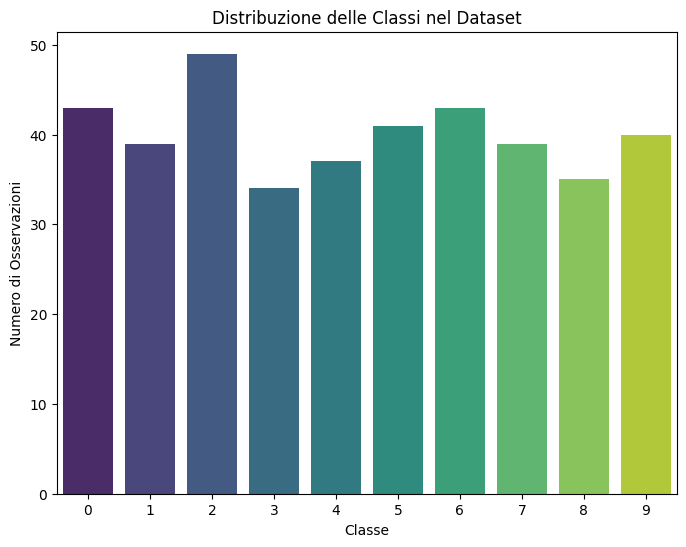

Percentuale di ciascuna classe:
   Percentuale
0        12.25
1        10.75
2        10.75
3        10.25
4        10.00
5         9.75
6         9.75
7         9.25
8         8.75
9         8.50


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conto le occorrenze di ciascuna classe
class_counts = df['Class'].value_counts()


# Creo un grafico a barre della distribuzione delle classi
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='viridis')

plt.title('Distribuzione delle Classi nel Dataset')
plt.xlabel('Classe')
plt.ylabel('Numero di Osservazioni')
plt.show()

# Visualizzo la percentuale di ciascuna classe
class_percentages = class_counts / len(df) * 100
class_percentages_df = pd.DataFrame({'Percentuale': class_percentages.values})

print("Percentuale di ciascuna classe:")
print(class_percentages_df)


In [5]:
from sklearn.preprocessing import RobustScaler
# Standardizzo le features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Addestro il modello di classificazione Random Forest
rf_classifier = RandomForestClassifier(random_state=42, bootstrap = True)
rf_classifier.fit(X_train_scaled, y_train)

# Valuto il modello
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')


classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=1)
print('Classification Report:')
print(classification_report_rf)

# Utilizzo StratifiedKFold per cross-validation su dati sbilanciati
cv_rf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Calcolo le prestazioni del modello con cross-validation
scores_rf = cross_val_score(rf_classifier, X_test_scaled, y_pred_rf, cv=cv_rf, scoring='accuracy')

# Stampo le stime dell'accuratezza per ogni fold
print("Cross-Validation Scores:", scores_rf)

# Stampo la media e la deviazione standard delle stime
print(f"Mean Accuracy: {scores_rf.mean():.2f}, Standard Deviation: {scores_rf.std():.2f}")

Accuracy: 0.33
Classification Report:
{'0': {'precision': 0.4666666666666667, 'recall': 0.7, 'f1-score': 0.56, 'support': 10.0}, '1': {'precision': 0.4, 'recall': 0.4444444444444444, 'f1-score': 0.4210526315789474, 'support': 9.0}, '2': {'precision': 0.2222222222222222, 'recall': 0.14285714285714285, 'f1-score': 0.17391304347826086, 'support': 14.0}, '3': {'precision': 0.375, 'recall': 0.21428571428571427, 'f1-score': 0.2727272727272727, 'support': 14.0}, '4': {'precision': 0.25, 'recall': 0.3333333333333333, 'f1-score': 0.28571428571428575, 'support': 6.0}, '5': {'precision': 0.2727272727272727, 'recall': 0.375, 'f1-score': 0.3157894736842105, 'support': 8.0}, '6': {'precision': 0.3333333333333333, 'recall': 0.25, 'f1-score': 0.28571428571428575, 'support': 12.0}, '7': {'precision': 0.3333333333333333, 'recall': 0.375, 'f1-score': 0.35294117647058826, 'support': 8.0}, '8': {'precision': 0.125, 'recall': 0.1111111111111111, 'f1-score': 0.11764705882352941, 'support': 9.0}, '9': {'preci

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Addestro il modello KNN di classificazione
knn_classifier = KNeighborsClassifier(weights = 'distance')
knn_classifier.fit(X_train_scaled, y_train)

# Valuto del modello
y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.2f}')

# Calcolo il Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse_knn)

# Calcolo l'indice R-quadro (R2)
r2_knn = r2_score(y_test, y_pred_knn)
print("R-squared (R2):", r2_knn)

classification_report_knn = classification_report(y_test, y_pred_knn, output_dict=True, zero_division=1)
print('Classification Report:')
print(classification_report_knn)

# Utilizzo StratifiedKFold per cross-validation su dati sbilanciati
cv_knn = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# Calcolo le prestazioni del modello con cross-validation
scores_knn = cross_val_score(knn_classifier, X_test_scaled, y_pred_knn, cv=cv_knn, scoring='accuracy')

# Stampo le stime dell'accuratezza per ogni fold
print("Cross-Validation Scores:", scores_knn)

# Stampo la media e la deviazione standard delle stime
print(f"Mean Accuracy: {scores_knn.mean():.2f}, Standard Deviation: {scores_knn.std():.2f}")

Accuracy: 0.30
Mean Squared Error: 4.42
R-squared (R2): 0.46235905170840885
Classification Report:
{'0': {'precision': 0.3076923076923077, 'recall': 0.4, 'f1-score': 0.34782608695652173, 'support': 10.0}, '1': {'precision': 0.3333333333333333, 'recall': 0.3333333333333333, 'f1-score': 0.3333333333333333, 'support': 9.0}, '2': {'precision': 0.3333333333333333, 'recall': 0.2857142857142857, 'f1-score': 0.30769230769230765, 'support': 14.0}, '3': {'precision': 0.375, 'recall': 0.21428571428571427, 'f1-score': 0.2727272727272727, 'support': 14.0}, '4': {'precision': 0.25, 'recall': 0.3333333333333333, 'f1-score': 0.28571428571428575, 'support': 6.0}, '5': {'precision': 0.2727272727272727, 'recall': 0.375, 'f1-score': 0.3157894736842105, 'support': 8.0}, '6': {'precision': 0.3, 'recall': 0.25, 'f1-score': 0.2727272727272727, 'support': 12.0}, '7': {'precision': 0.2857142857142857, 'recall': 0.25, 'f1-score': 0.26666666666666666, 'support': 8.0}, '8': {'precision': 0.16666666666666666, 'reca

In [8]:
from sklearn.naive_bayes import GaussianNB

# Addestro il modello Naive Bayes di classificazione
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Valuto del modello
y_pred_nb = nb_classifier.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb:.2f}')

# Calcolo il Mean Squared Error (MSE)
mse_nb = mean_squared_error(y_test, y_pred_nb)
print("Mean Squared Error:", mse_nb)

# Calcolo l'indice R-quadro (R2)
r2_nb = r2_score(y_test, y_pred_nb)
print("R-squared (R2):", r2_nb)

classification_report_nb = classification_report(y_test, y_pred_nb, output_dict=True, zero_division=1)
print('Classification Report:')
print(classification_report_nb)

# Utilizzo StratifiedKFold per cross-validation su dati sbilanciati
cv_nb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcolo le prestazioni del modello con cross-validation
scores_nb = cross_val_score(nb_classifier, X_test_scaled, y_pred_nb, cv=cv_nb, scoring='accuracy')

# Stampo le stime dell'accuratezza per ogni fold
print("Cross-Validation Scores:", scores_nb)

# Stampo la media e la deviazione standard delle stime
print(f"Mean Accuracy: {scores_nb.mean():.2f}, Standard Deviation: {scores_nb.std():.2f}")

Accuracy: 0.15
Mean Squared Error: 7.77
R-squared (R2): 0.05487100266387712
Classification Report:
{'0': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10.0}, '1': {'precision': 0.21428571428571427, 'recall': 0.3333333333333333, 'f1-score': 0.2608695652173913, 'support': 9.0}, '2': {'precision': 0.14814814814814814, 'recall': 0.2857142857142857, 'f1-score': 0.1951219512195122, 'support': 14.0}, '3': {'precision': 0.16666666666666666, 'recall': 0.07142857142857142, 'f1-score': 0.1, 'support': 14.0}, '4': {'precision': 0.16129032258064516, 'recall': 0.8333333333333334, 'f1-score': 0.27027027027027023, 'support': 6.0}, '5': {'precision': 0.08333333333333333, 'recall': 0.125, 'f1-score': 0.1, 'support': 8.0}, '6': {'precision': 0.5, 'recall': 0.08333333333333333, 'f1-score': 0.14285714285714285, 'support': 12.0}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 1.0, 'support': 8.0}, '8': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9.0}, '9': {'precision':

C:\Users\danii\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [1]:
import xgboost as xgb

# Addestro il modello Naive Bayes di classificazione
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", random_state = 42, num_class=len(set(y)))
xgb_classifier.fit(X_train_scaled, y_train)

# Valuto del modello
y_pred_xgb = xgb_classifier.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb:.2f}')

# Calcolo il Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error:", mse_xgb)

# Calcolo l'indice R-quadro (R2)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R-squared (R2):", r2_xgb)

classification_report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True, zero_division=1)
print('Classification Report:')
print(classification_report_xgb)

# Utilizzo StratifiedKFold per cross-validation su dati sbilanciati
cv_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcolo le prestazioni del modello con cross-validation
scores_xgb = cross_val_score(xgb_classifier, X_test_scaled, y_pred_xgb, cv=cv_xgb, scoring='accuracy')

# Stampo le stime dell'accuratezza per ogni fold
print("Cross-Validation Scores:", scores_xgb)

# Stampo la media e la deviazione standard delle stime
print(f"Mean Accuracy: {scores_xgb.mean():.2f}, Standard Deviation: {scores_xgb.std():.2f}")


NameError: name 'y' is not defined

In [10]:
from sklearn import svm


svm_classifier = svm.SVC(random_state = 42, kernel = 'linear' )
svm_classifier.fit(X_train_scaled, y_train)

# Valuto il modello Support Vector Machine (SVM)
y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm:.2f}')

# Calcolo il Mean Squared Error (MSE)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Mean Squared Error:", mse_svm)

# Calcolo l'indice R-quadro (R2)
r2 = r2_score(y_test, y_pred_svm)
print("R-squared (R2):", r2)

classification_report_svm = classification_report(y_test, y_pred_svm, output_dict=True, zero_division=1)
print('Classification Report:')
print(classification_report_svm)

# Utilizzo StratifiedKFold per cross-validation su dati sbilanciati
cv_svm = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcolo le prestazioni del modello con cross-validation
scores_svm = cross_val_score(svm_classifier, X_test_scaled, y_pred_svm, cv=cv_svm, scoring='accuracy')

# Stampo le stime dell'accuratezza per ogni fold
print("Cross-Validation Scores:", scores_svm)

# Stampo la media e la deviazione standard delle stime
print(f"Mean Accuracy: {scores_svm.mean():.2f}, Standard Deviation: {scores_svm.std():.2f}")

Accuracy: 0.27
Mean Squared Error: 6.02
R-squared (R2): 0.2677378939557967
Classification Report:
{'0': {'precision': 0.42857142857142855, 'recall': 0.9, 'f1-score': 0.5806451612903225, 'support': 10.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 1.0, 'support': 9.0}, '2': {'precision': 0.3, 'recall': 0.42857142857142855, 'f1-score': 0.3529411764705882, 'support': 14.0}, '3': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14.0}, '4': {'precision': 0.15789473684210525, 'recall': 0.5, 'f1-score': 0.23999999999999996, 'support': 6.0}, '5': {'precision': 0.2857142857142857, 'recall': 0.25, 'f1-score': 0.26666666666666666, 'support': 8.0}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 1.0, 'support': 12.0}, '7': {'precision': 0.1, 'recall': 0.125, 'f1-score': 0.11111111111111112, 'support': 8.0}, '8': {'precision': 1.0, 'recall': 0.1111111111111111, 'f1-score': 0.19999999999999998, 'support': 9.0}, '9': {'precision': 0.29411764705882354, 'recall': 0.5, 'f1-score'

C:\Users\danii\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


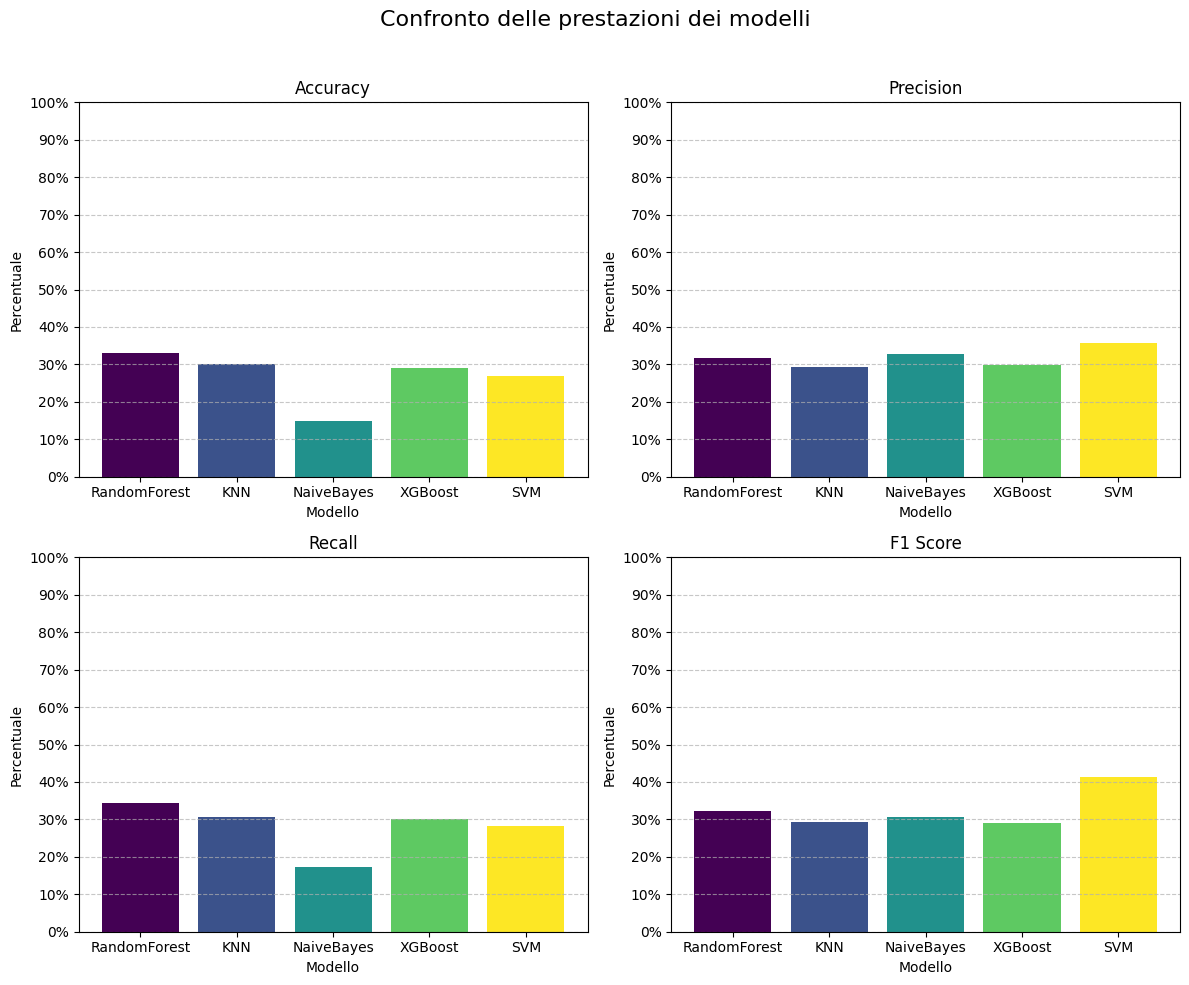

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

# Definisco i nomi dei modelli e le rispettive metriche
model_names = ['RandomForest', 'KNN', 'NaiveBayes', 'XGBoost', 'SVM']
accuracies = [classification_report_rf['accuracy'], classification_report_knn['accuracy'], classification_report_nb['accuracy'], classification_report_xgb['accuracy'], classification_report_svm['accuracy']]
precisions = [classification_report_rf['macro avg']['precision'], classification_report_knn['macro avg']['precision'], classification_report_nb['macro avg']['precision'], classification_report_xgb['macro avg']['precision'], classification_report_svm['macro avg']['precision']]
recalls = [classification_report_rf['macro avg']['recall'], classification_report_knn['macro avg']['recall'], classification_report_nb['macro avg']['recall'], classification_report_xgb['macro avg']['recall'], classification_report_svm['macro avg']['recall']]
f1_scores = [classification_report_rf['macro avg']['f1-score'], classification_report_knn['macro avg']['f1-score'], classification_report_nb['macro avg']['f1-score'], classification_report_xgb['macro avg']['f1-score'], classification_report_svm['macro avg']['f1-score']]

# Faccio il plot delle metriche con scale diverse
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Accuracy
axes[0, 0].bar(model_names, accuracies, color=plt.cm.viridis(np.linspace(0, 1, len(model_names))))
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)  # Imposta la scala da 0 a 1 per l'accuracy
axes[0, 0].yaxis.set_major_locator(plt.MaxNLocator(11))  # Imposta la suddivisione dell'asse y ogni 10
axes[0, 0].yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0, symbol='%'))  # Imposta la percentuale sull'asse y

# Precision
axes[0, 1].bar(model_names, precisions, color=plt.cm.viridis(np.linspace(0, 1, len(model_names))))
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)  # Imposta la scala da 0 a 1 per la precisione
axes[0, 1].yaxis.set_major_locator(plt.MaxNLocator(11))  # Imposta la suddivisione dell'asse y ogni 10
axes[0, 1].yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0, symbol='%'))  # Imposta la percentuale sull'asse y

# Recall
axes[1, 0].bar(model_names, recalls, color=plt.cm.viridis(np.linspace(0, 1, len(model_names))))
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0, 1)  # Imposta la scala da 0 a 1 per il recall
axes[1, 0].yaxis.set_major_locator(plt.MaxNLocator(11))  # Imposta la suddivisione dell'asse y ogni 10
axes[1, 0].yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0, symbol='%'))  # Imposta la percentuale sull'asse y

# F1 Score
axes[1, 1].bar(model_names, f1_scores, color=plt.cm.viridis(np.linspace(0, 1, len(model_names))))
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_ylim(0, 1)  # Imposta la scala da 0 a 1 per l'F1 Score
axes[1, 1].yaxis.set_major_locator(plt.MaxNLocator(11))  # Imposta la suddivisione dell'asse y ogni 10
axes[1, 1].yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0, symbol='%'))  # Imposta la percentuale sull'asse y

# Aggiungo etichette e titoli
fig.suptitle('Confronto delle prestazioni dei modelli', fontsize=16)
for ax in axes.flat:
    ax.set_xlabel('Modello')
    ax.set_ylabel('Percentuale')
    ax.set_xticks(model_names)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('Prova1.png')

plt.show()
